<a href="https://colab.research.google.com/github/RFJC21/ANN_Keras_Binary_Classification/blob/master/ANN_Keras_Classification_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

In [0]:
from google.colab import files
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cancer_classification.csv']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Visualize Data

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


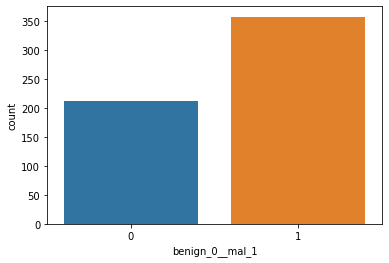

In [0]:
sns.countplot(x='benign_0__mal_1',data=df)

In [0]:
correlation=df.corr()
correlation['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [0]:
mask=np.zeros_like(df.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

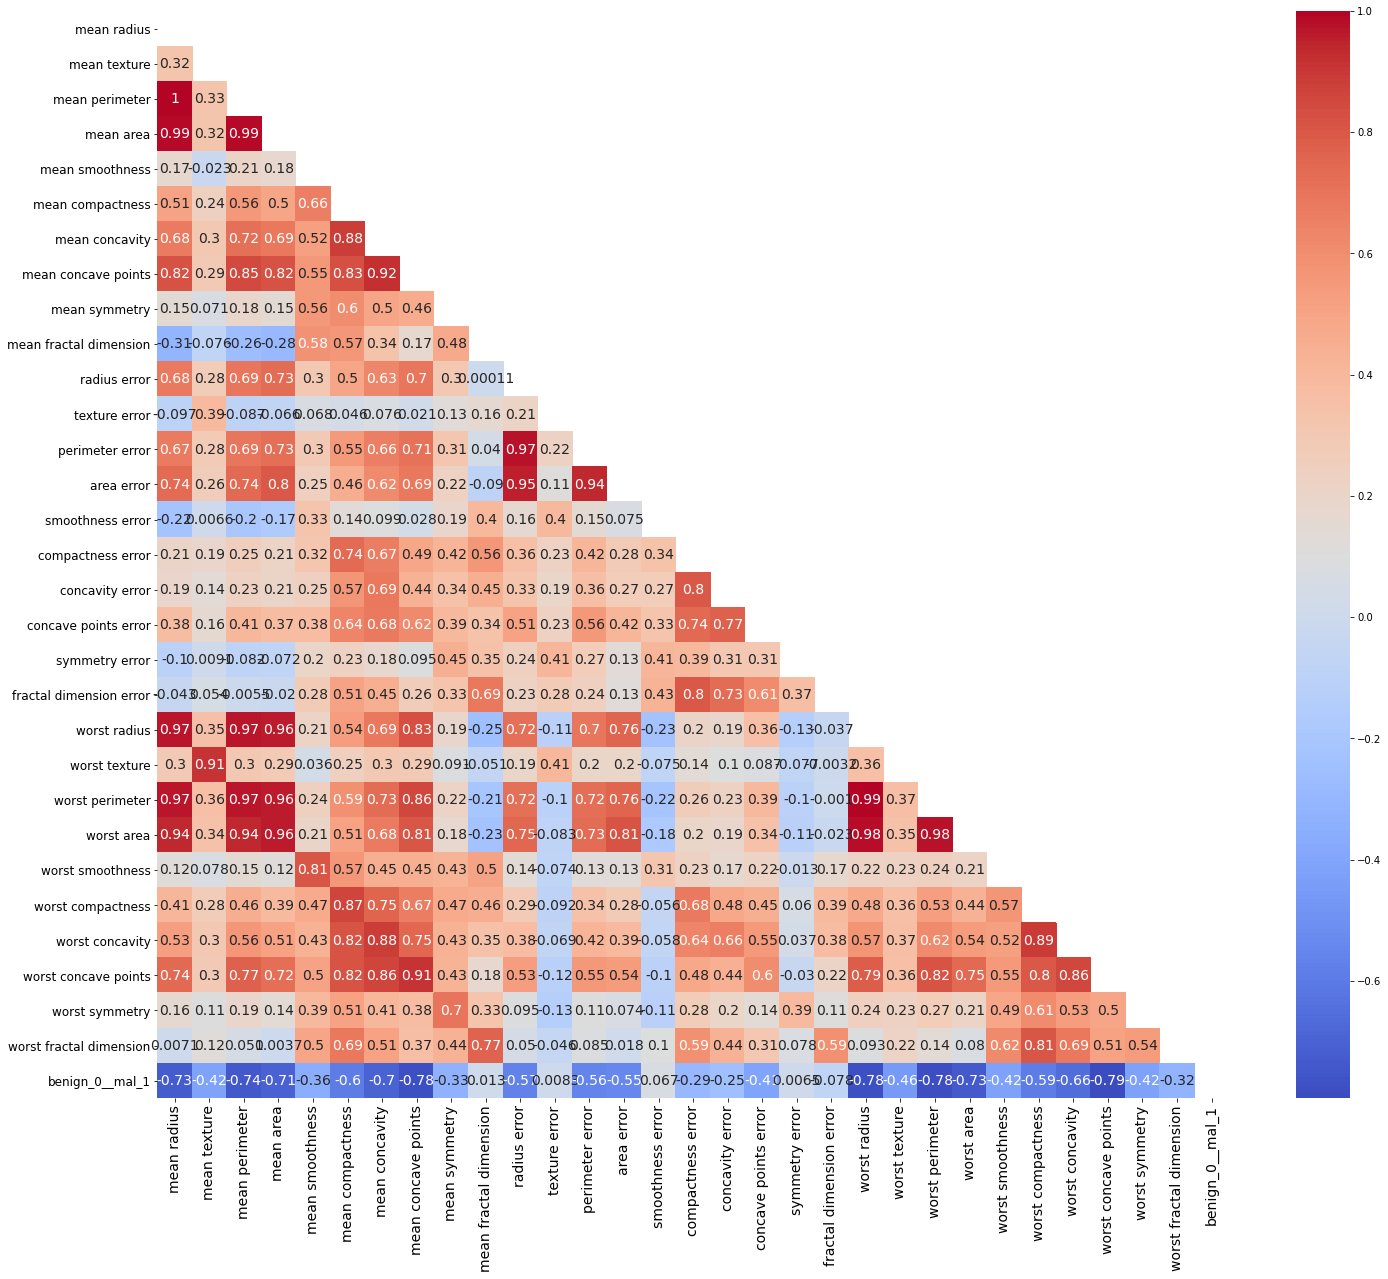

In [0]:
#Heat Map com matplotlib and seaborn
plt.figure(figsize=(24,20))
sns.heatmap(df.corr(), mask=mask, cmap="coolwarm",annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

# Split Data

In [0]:
#.values because of the validation data
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

# Scale Date

In [0]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Create Model

In [0]:
X_train.shape

(426, 30)

In [0]:
# tipicaly, number of neurons (units) -> number of features, neste caso 19!!

model=Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#sigmoid: output between 0 and 1
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

# Fit Model to Trainning Data

In [0]:
# also pass Validation Data -> after every epoch on trainning in the training data, it runs on the test data anc check the loss on the test data
# because of the size of trainning data, lets use batch sizes
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600)

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6720 - val_loss: 0.6642
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6358 - val_loss: 0.6381
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6086 - val_loss: 0.6086
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5716 - val_loss: 0.5701
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5238 - val_loss: 0.5287
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4844 - val_loss: 0.4849
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4449 - val_loss: 0.4373
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4005 - val_loss: 0.3861
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3472 - val_loss: 0.3399
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3113 - val_loss: 0.2957
Epoch 11

# Plot Losses

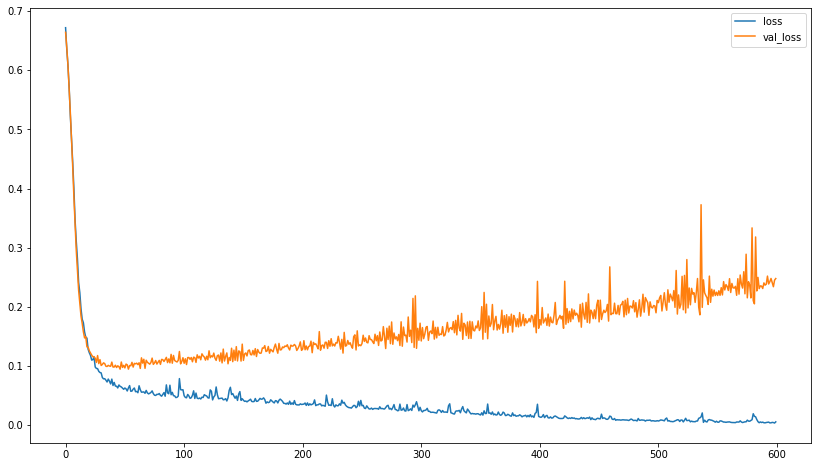

In [0]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

In [0]:
#epoch number 20 shws us that we arfe overfitting!

# Create other model with early stopping!

In [0]:
# tipicaly, number of neurons (units) -> number of features, neste caso 19!!

model=Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#sigmoid: output between 0 and 1
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [0]:
# also pass Validation Data -> after every epoch on trainning in the training data, it runs on the test data anc check the loss on the test data
# because of the size of trainning data, lets use batch sizes
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6579 - val_loss: 0.6273
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6081 - val_loss: 0.5825
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5609 - val_loss: 0.5304
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5208 - val_loss: 0.4780
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4605 - val_loss: 0.4271
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4136 - val_loss: 0.3764
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3744 - val_loss: 0.3318
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3292 - val_loss: 0.2956
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3087 - val_loss: 0.2661
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2726 - val_loss: 0.2459
Epoch 11/

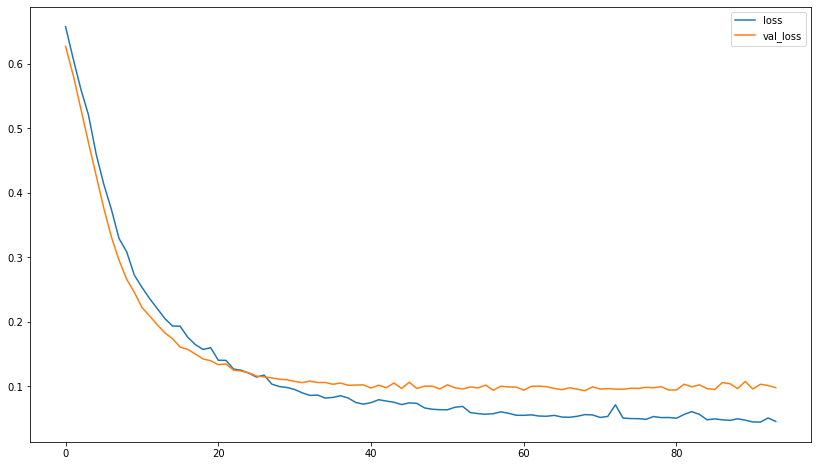

In [0]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

# Other model with Drop out layer!

In [0]:
# tipicaly, number of neurons (units) -> number of features, neste caso 19!!
#dropout prevents overfitting!

model=Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#sigmoid: output between 0 and 1
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [0]:
# also pass Validation Data -> after every epoch on trainning in the training data, it runs on the test data anc check the loss on the test data
# because of the size of trainning data, lets use batch sizes
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6970 - val_loss: 0.6829
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6791 - val_loss: 0.6699
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6629 - val_loss: 0.6596
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6629 - val_loss: 0.6473
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6420 - val_loss: 0.6349
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6451 - val_loss: 0.6201
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6017 - val_loss: 0.5915
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5962 - val_loss: 0.5494
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5728 - val_loss: 0.5130
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5334 - val_loss: 0.4787
Epoch 11/

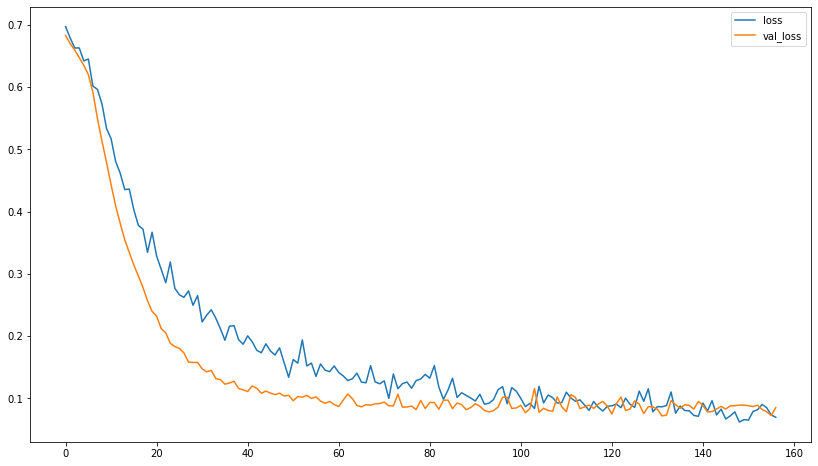

In [0]:
#perfect behaviour
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

# Evaluation on test data

In [0]:
predictions=model.predict_classes(X_test)m

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
predictions

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [0]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


In [0]:
# apenas falhamos 1